# Plotting multiple charts in a grid

### matplotlib and seaborn also support plotting of mutiple charts in a grid using plt.subplots whch return a set of axes for plotting

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896, ]

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
flowers_df = sns.load_dataset('iris')

In [12]:
flowers_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

In [19]:
tips_df = sns.load_dataset('tips')

In [21]:
flights_df = sns.load_dataset('flights').pivot('month', 'year', 'passengers')

C:\Users\Divya\AppData\Local\Temp\ipykernel_568\805629850.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_df = sns.load_dataset('flights').pivot('month', 'year', 'passengers')


In [24]:
from urllib.request import urlretrieve
urlretrieve('https://i.imgur.com/SkPbq.jpg', 'chart.jpg')
from PIL import Image
img = Image.open('chart.jpg')

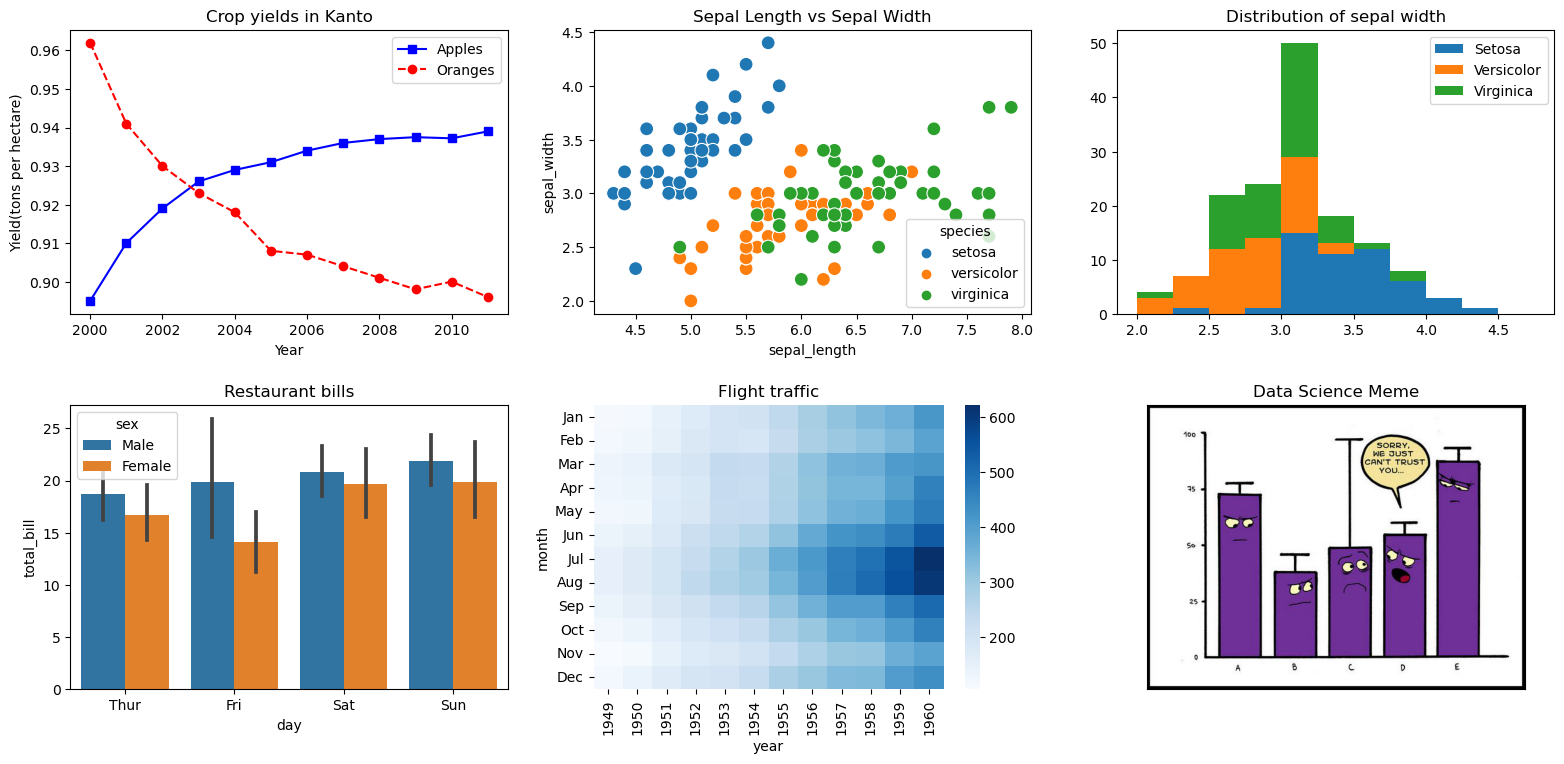

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))

#use the axes for plotting
axes[0,0].plot(years, apples, 's-b')
axes[0,0].plot(years, oranges, 'o--r')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Yield(tons per hectare)')
axes[0,0].legend(['Apples', 'Oranges'])
axes[0,0].set_title('Crop yields in Kanto')

#pass the axes into seaborn
axes[0,1].set_title('Sepal Length vs Sepal Width')
sns.scatterplot(x=flowers_df.sepal_length,
                y=flowers_df.sepal_width,
                hue=flowers_df.species,
                s=100,
                ax=axes[0,1]);

#use the axes for plotting
axes[0,2].set_title('Distribution of sepal width')
axes[0,2].hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width],
               bins=np.arange(2,5,0.25),
               stacked=True);
axes[0,2].legend(['Setosa', 'Versicolor', 'Virginica']);

#pass the axes into seaborn
axes[1,0].set_title('Restaurant bills')
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df, ax=axes[1,0]);


# #pass the axes into seaborn
axes[1,1].set_title('Flight traffic')
sns.heatmap(flights_df, cmap='Blues', ax=axes[1,1]);

#plot an image using axes
axes[1,2].set_title('Data Science Meme')
axes[1,2].imshow(img)
axes[1,2].grid(False)
axes[1,2].set_xticks([])
axes[1,2].set_yticks([]);

plt.tight_layout(pad=2);

# Pair plots with seaborn

#### seaborn also provides a helper function sns.pairplot to automaticall plot several different charts for pairs of features within a dataframe

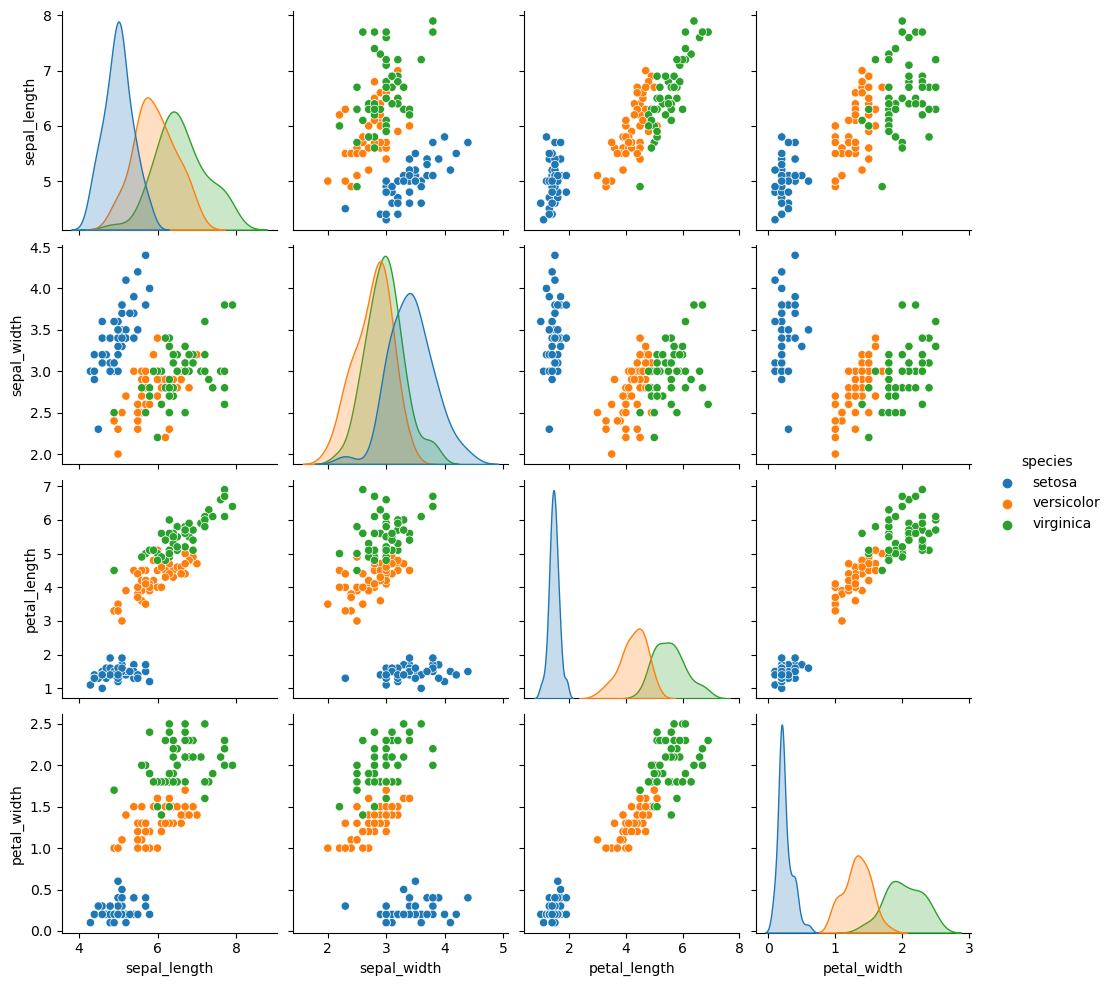

In [29]:
sns.pairplot(flowers_df, hue='species');

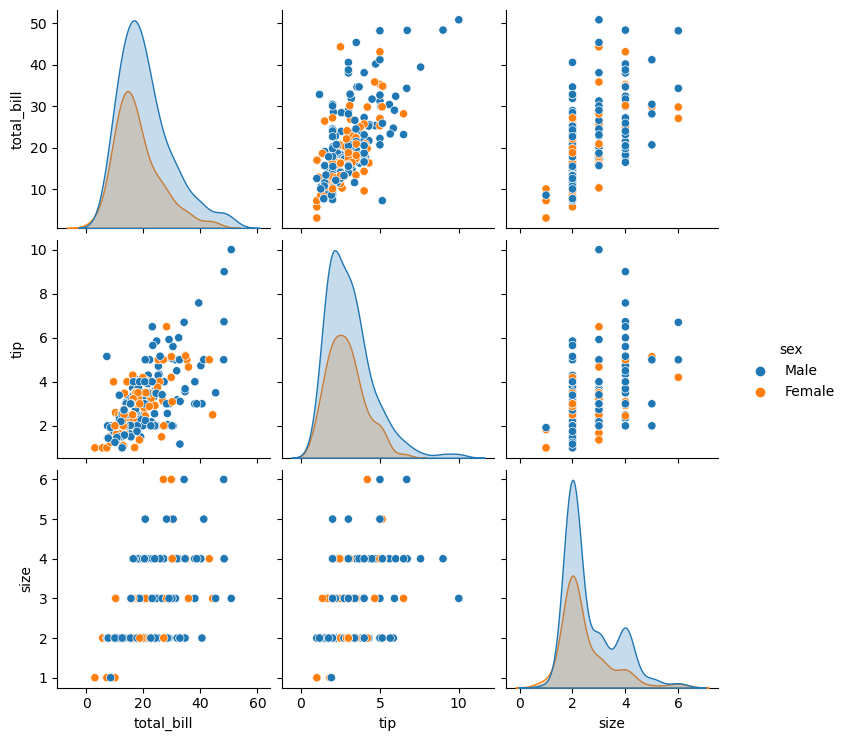

In [30]:
sns.pairplot(tips_df, hue='sex');